<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [23]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
penguim = sns.load_dataset('penguins')

In [25]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

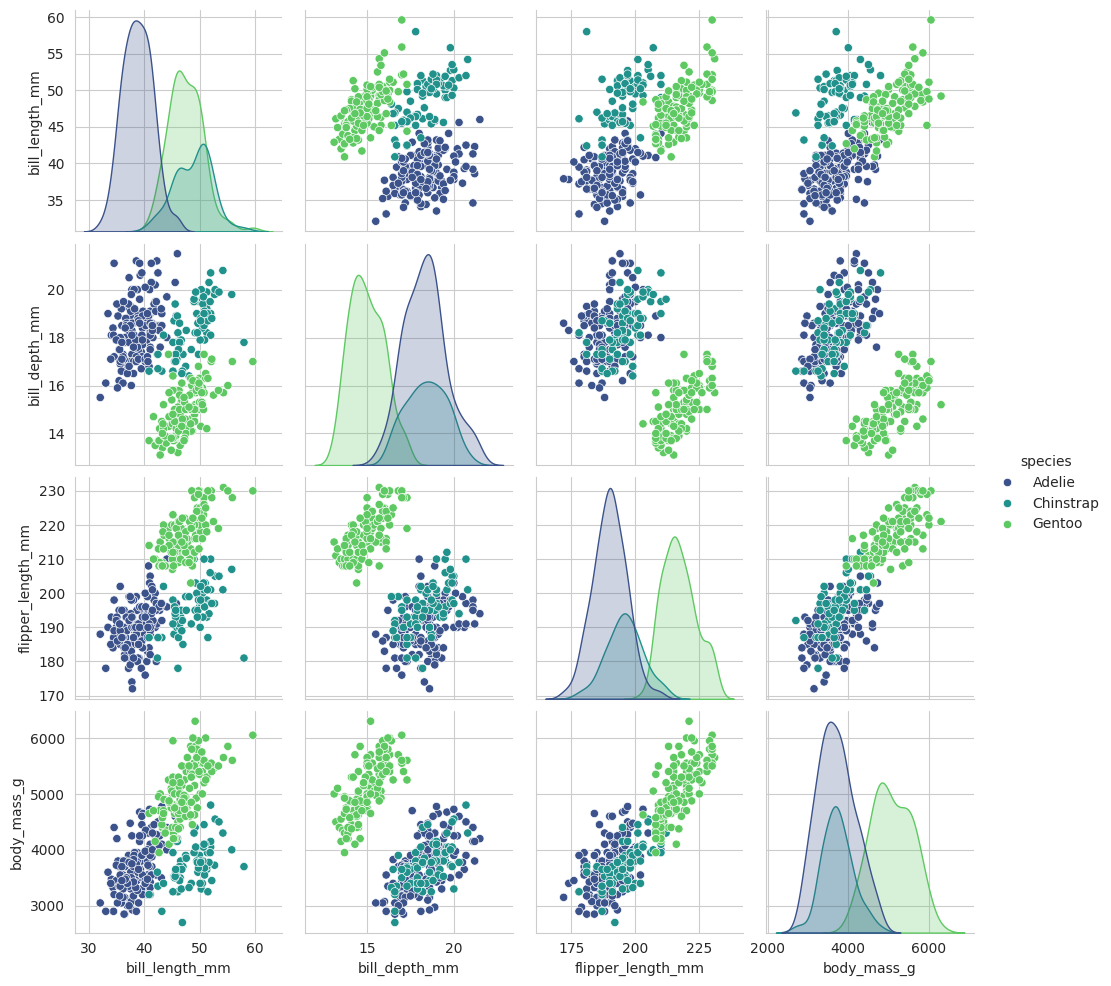

In [26]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="viridis")

**Comentário:**
* Os pinguins da espécie **Adelie** possui maior complimento do bico (**bill_length_mm**).
* Os pinguins da espécie **Adelie** possui maior profundidade do bico (**bill_depth_mm**).
* Os pinguins da espécie **Gentoo** possui a menor profundidade do bico (**bill_dept_mm**)
* Os pinguins da espécie **Gentoo** possui a maior massa corporal (**body_mass_g**).
* Os pinguins da espécie **Gentoo** possui o maior complimento da nadadeira (**flipper_length_mm**)

 - Sexo por espécie:

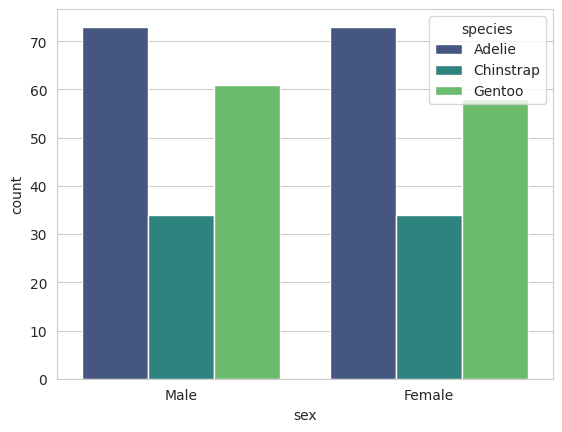

In [27]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="viridis")

**Comentário:**
* A proporção de femea e macho por espécie parece ser equilibrada ou próxima.

 - Ilha por espécie:

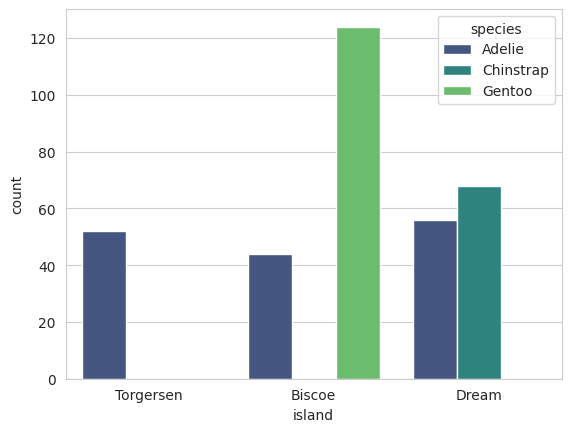

In [28]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="viridis")

**Comentário:**
* A ilha **Torgersen** possui pinguins da espécie **Adelie**.
* A ilha **Biscoe** possui pinguins da espécie **Adelie** e **Gentoo**, nota-se que a quantidade de pinguins **Gentoo** é o triplo da espécie **Adelie**.
* A ilha **Dream** possui pinguins da espécie **Adelie** e **Chinstrap**, a quantidade de pinguins **Chinstrap** é um pouco maior doque da espécie **Adelie**.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [29]:
#-- verificando as colunas que deve possuir e sua  quantidade de valores faltantes
penguim.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [30]:
#-- informações do DataFRame
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [31]:
#-- informação descritiva do DataFrame
penguim.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [32]:
# resposta da questão 2.1
#-- subistituindo os dados faltantes pela média da própria coluna
penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean(), inplace=True)
penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean(), inplace=True)
penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean(), inplace=True)
penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean(), inplace=True)

<ipython-input-32-129559704>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean(), inplace=True)
<ipython-input-32-129559704>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [33]:
#--A coluna sex possui 11 valores faltantes, podemos remover essas linha
penguim.dropna(inplace=True)

In [34]:
#-- Confirmando se substituição dos dados foi concluída
penguim.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [35]:
#--Informações do DataFrame
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [36]:
#--Vamos remove os dados duplicados da coluna sex
penguim['sex'].drop_duplicates()

,sex
0,Male
1,Female


In [37]:
# resposta da questão 2.2
#--Criando as novas colunas com seus respectivos dados
penguim['island_torgerson_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Torgerson' else 0)
penguim['island_biscoe_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Biscoe' else 0)
penguim['island_dream_nom'] = penguim['island'].apply(lambda x: 1 if x == 'Dream' else 0)
penguim['sex_male_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Male' else 0)
penguim['sex_female_nom'] = penguim['sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [38]:
#--Verificando se no DataFrame existe as novas colunas
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_torgerson_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0,0,1,0


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [39]:
# resposta da questão 2.3
#--Removendo as colunas island e sex
penguim.drop(['island', 'sex'], axis=1, inplace=True)


In [40]:
penguim.head(5)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_torgerson_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,0,1,0


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [47]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(penguim.drop('species', axis=1), penguim['species'], test_size=0.33, random_state=44)

In [48]:
#--Imprimindo os dados de treino, e test
print(f'Dados de treino X: {x_train.shape}')
print(f'Dados de treino Y: {y_train.shape}')
print(f'Dados de teste X : {x_test.shape}')
print(f'Dados de teste Y: {y_test.shape}')

Dados de treino X: (223, 9)
Dados de treino Y: (223,)
Dados de teste X : (110, 9)
Dados de teste Y: (110,)


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 7

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import graphviz

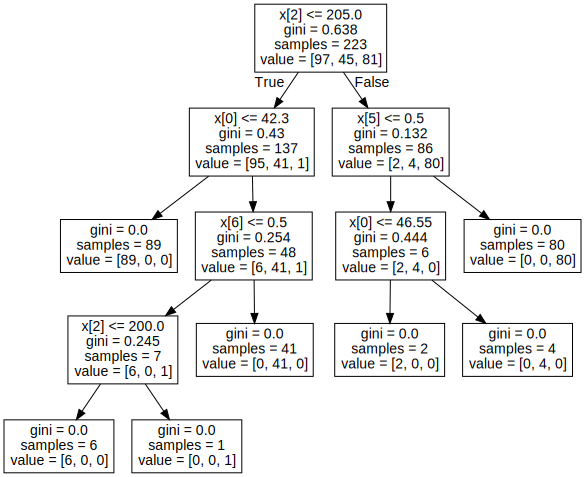

In [54]:
# resposta da questão 3.1
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
dados_arvore_decisao = tree.export_graphviz(model, out_file=None)
grafico = graphviz.Source(dados_arvore_decisao)
grafico


In [57]:
#--contando o numero de folhas
num_folhas = model.get_n_leaves()
print(f'A árvore possui {num_folhas} folhas')

A árvore possui 7 folhas


In [58]:
#--Retornando um dicionario dos atributos do modelo
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_torgerson_nom', 'island_biscoe_nom',
        'island_dream_nom', 'sex_male_nom', 'sex_female_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': np.int64(3),
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7ecc2c27d300>}

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** O modelo classificou corretamente os pinguins da espécie Gentoo,mas errou 2 na espécie Chinstrap e 1 na espécie Adelie

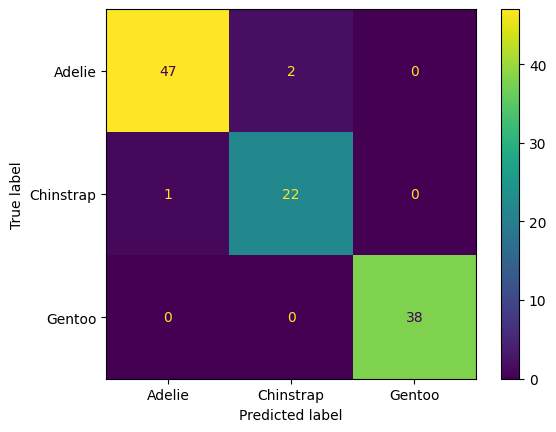

In [63]:
# resposta da questão 3.2.a
y_pred = model.predict(x_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
matriz_confusao = ConfusionMatrixDisplay(matriz_confusao, display_labels=model.classes_)
matriz_confusao.plot()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [64]:
# resposta da questão 3.2.b
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.9727272727272728


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [66]:
#--verificando as colunas
penguim.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_torgerson_nom', 'island_biscoe_nom',
       'island_dream_nom', 'sex_male_nom', 'sex_female_nom'],
      dtype='object')

In [70]:
# resposta da questão 4.1
novo_pinguim = np.array([[0, 1, 0, 38.2, 18.1, 185.0, 3950.0, 0, 1]])
predicao = model.predict(novo_pinguim.reshape(1, -1))
print(f'A espécie do novo pinguim é: {predicao[0]}')

A espécie do novo pinguim é: Adelie


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---